In [83]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [60]:
mnist=tf.keras.datasets.mnist

In [61]:
#x-image,y-label

In [62]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() #automatically train data into 70,30 no need of sklearn split

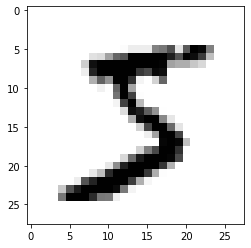

In [63]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [64]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [65]:
#Scalling,-normalization,standarization
#present normalization  features scales to (0-1)

In [66]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [67]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [68]:
model=tf.keras.models.Sequential()# a feed forward model
model.add(tf.keras.layers.Flatten())#takes 28x28 and make it to 1x784 matrix
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))# a simple fully connected layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#acitvation func-if it crosses threshold value activates ,relu trains(0-9),sigmoid train(0 or 1)

model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # takes multiple values trained in dense-layer


In [69]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])#calculate the error to minimize the loss
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2642 - acc: 0.9226
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1069 - acc: 0.9667
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0723 - acc: 0.9771
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0526 - acc: 0.9830
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0412 - acc: 0.9868
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0319 - acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.0257 - acc: 0.9910
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0205 - acc: 0.9928
Epoch 9/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0199 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 5s 79us/sample - loss: 

In [70]:
val_loss,val_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.1138 - acc: 0.9751


In [71]:
val_loss

0.1137532049922469

In [72]:
val_acc

0.9751

In [76]:
model.save(r'C:\pds\digit-recognition\digit_model.model')

In [78]:
new_model=tf.keras.models.load_model(r'C:\pds\digit-recognition\digit_model.model')

In [79]:
predictions=new_model.predict(x_test)

In [82]:
predictions[0]

array([9.7172941e-14, 3.7938823e-14, 8.1138136e-09, 2.5746086e-08,
       1.9318404e-13, 1.4456961e-12, 1.4947869e-18, 1.0000000e+00,
       2.4510710e-10, 2.6799691e-08], dtype=float32)

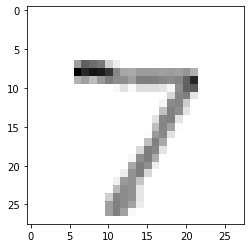

In [81]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()

In [84]:
np.argmax(predictions[0])

7